In [1]:
import sys
sys.path.append('/usr/local/lib/python2.7/dist-packages')
sys.path.append('/usr/local/lib/python3.5/dist-packages')
sys.path

['/home/ga96kub/3d_retrieval',
 '/opt/anaconda3/lib/python37.zip',
 '/opt/anaconda3/lib/python3.7',
 '/opt/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/opt/anaconda3/lib/python3.7/site-packages',
 '/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/home/ga96kub/.ipython',
 '/usr/local/lib/python2.7/dist-packages',
 '/usr/local/lib/python3.5/dist-packages']

In [2]:
import create_dict
import torch
import os
import json
import utils
import numpy as np

# Clean Data

In [ ]:
#folder_name = '/data2'
#create_dict.clean_obj(folder_name)

# Generate Dataset

In [ ]:
#!pip3 freeze | grep PyWavefront

In [ ]:
#import pywavefront
#mesh2 = pywavefront.Wavefront('/home/.schramm/Documents/3d_retrieval/data/02747177/8bdea15ae5d929d0a2eb129d649f68cf/models/model_normalized.obj', collect_faces='True')


In [ ]:
input_folder = '/data'
suffix = '_allClasses1000_points2500' #suffix will append data_trainxxxx.json
max_elements_per_class = 1000
create_dict.create_dictionary(input_folder, max_elements_per_class, suffix, points_per_object=2500)

# Initialize Network

In [3]:
import SiameseNet

device = torch.device("cuda:0" if torch.cuda.torch.cuda.is_available() else "cpu")

batch_size = 64
net = SiameseNet.SiameseNet(batch_size)
suffix = '_100VAL' # comment in if not coming from generating the dataset
path_to_params = "models/baseline_bs64_ALL_from_zero.pt" # if file does not exist or is empty it starts from untrained and later saves to the file

# shift to GPU if available

net.to(device)
working_dir = os.getcwd()
data_dir_train = os.path.join(working_dir, 'data_train'+suffix+'.json')
data_dir_val = os.path.join(working_dir, 'data_val'+suffix+'.json')
class_dir = os.path.join(working_dir, 'class_dict'+suffix+'.json')

path_to_hidden = str(path_to_params[:-3] + '_hidden.pt')
if os.path.isfile(path_to_hidden):
    net.hidden = torch.load(path_to_hidden)

if os.path.isfile(path_to_params):
    if os.stat(path_to_params).st_size != 0:
        net.load_state_dict(torch.load(path_to_params, map_location=device))  #Loads pretrained net if file exists and if not empty
else:
    open(path_to_params, "x") #Creates parameter file if it does not exist

In [4]:
device

device(type='cuda', index=0)

# Train Network

In [5]:
#training parameters

writer_suffix = '_baseline_final_ALL_from12'
margin = 0.5
num_epochs = 100
print_batch = 30
lr = 0.0005



In [6]:
net = SiameseNet.train(net, num_epochs, margin, lr, print_batch, 
                       data_dir_train, data_dir_val, writer_suffix, path_to_params, working_dir, class_dir)

Number of training triplets: 12605
[1,    31] loss: 0.230
[1,    61] loss: 0.206
[1,    91] loss: 0.216
[1,   121] loss: 0.202
[1,   151] loss: 0.209
[1,   181] loss: 0.196
[1,   211] loss: 0.215
[1,   241] loss: 0.220
[1,   271] loss: 0.206
[1,   301] loss: 0.198
[1,   331] loss: 0.215
[1,   361] loss: 0.207
[1,   391] loss: 0.220
Doing Evaluation with 1299 validation triplets
Validation Loss: 0.7890984445810318
Number of training triplets: 12605
[2,    31] loss: 0.213
[2,    61] loss: 0.195
[2,    91] loss: 0.203
[2,   121] loss: 0.199
[2,   151] loss: 0.200
[2,   181] loss: 0.209
[2,   211] loss: 0.205
[2,   241] loss: 0.207
[2,   271] loss: 0.212
[2,   301] loss: 0.196
[2,   331] loss: 0.213
[2,   361] loss: 0.190
[2,   391] loss: 0.210
Doing Evaluation with 1299 validation triplets
Validation Loss: 0.789469163119793
Number of training triplets: 12605
[3,    31] loss: 0.204
[3,    61] loss: 0.195
[3,    91] loss: 0.186
[3,   121] loss: 0.197
[3,   151] loss: 0.188
[3,   181] loss: 

[20,   181] loss: 0.149
[20,   211] loss: 0.158
[20,   241] loss: 0.162
[20,   271] loss: 0.155
[20,   301] loss: 0.151
[20,   331] loss: 0.157
[20,   361] loss: 0.162
[20,   391] loss: 0.165
Doing Evaluation with 1299 validation triplets
Validation Loss: 0.7654535621404648
Number of training triplets: 12605
[21,    31] loss: 0.169
[21,    61] loss: 0.163
[21,    91] loss: 0.166
[21,   121] loss: 0.151
[21,   151] loss: 0.144
[21,   181] loss: 0.173
[21,   211] loss: 0.163
[21,   241] loss: 0.153
[21,   271] loss: 0.166
[21,   301] loss: 0.163
[21,   331] loss: 0.155
[21,   361] loss: 0.171
[21,   391] loss: 0.159
Doing Evaluation with 1299 validation triplets
Validation Loss: 0.7114130675792694
Number of training triplets: 12605
[22,    31] loss: 0.179
[22,    61] loss: 0.168
[22,    91] loss: 0.156
[22,   121] loss: 0.157
[22,   151] loss: 0.159
[22,   181] loss: 0.154
[22,   211] loss: 0.172
[22,   241] loss: 0.152
[22,   271] loss: 0.156
[22,   301] loss: 0.157
[22,   331] loss: 0.

[39,   211] loss: 0.139
[39,   241] loss: 0.133
[39,   271] loss: 0.149
[39,   301] loss: 0.132
[39,   331] loss: 0.151
[39,   361] loss: 0.129
[39,   391] loss: 0.138
Doing Evaluation with 1299 validation triplets
Validation Loss: 0.7009857803583145
Number of training triplets: 12605
[40,    31] loss: 0.154
[40,    61] loss: 0.136
[40,    91] loss: 0.140
[40,   121] loss: 0.141
[40,   151] loss: 0.144
[40,   181] loss: 0.128
[40,   211] loss: 0.134
[40,   241] loss: 0.121
[40,   271] loss: 0.145
[40,   301] loss: 0.132
[40,   331] loss: 0.132
[40,   361] loss: 0.133
[40,   391] loss: 0.142
Doing Evaluation with 1299 validation triplets
Validation Loss: 0.6891957372426987
Number of training triplets: 12605
[41,    31] loss: 0.135
[41,    61] loss: 0.126
[41,    91] loss: 0.142
[41,   121] loss: 0.140
[41,   151] loss: 0.132
[41,   181] loss: 0.121
[41,   211] loss: 0.130
[41,   241] loss: 0.121
[41,   271] loss: 0.122
[41,   301] loss: 0.125
[41,   331] loss: 0.126
[41,   361] loss: 0.

[58,   241] loss: 0.099
[58,   271] loss: 0.135
[58,   301] loss: 0.115
[58,   331] loss: 0.119
[58,   361] loss: 0.128
[58,   391] loss: 0.111
Doing Evaluation with 1299 validation triplets
Validation Loss: 0.6957161650061607
Number of training triplets: 12605
[59,    31] loss: 0.112
[59,    61] loss: 0.119
[59,    91] loss: 0.129
[59,   121] loss: 0.115
[59,   151] loss: 0.116
[59,   181] loss: 0.125
[59,   211] loss: 0.115
[59,   241] loss: 0.116
[59,   271] loss: 0.124
[59,   301] loss: 0.114
[59,   331] loss: 0.113
[59,   361] loss: 0.106
[59,   391] loss: 0.116
Doing Evaluation with 1299 validation triplets
Validation Loss: 0.6407575398683548
Number of training triplets: 12605
[60,    31] loss: 0.119
[60,    61] loss: 0.115
[60,    91] loss: 0.105
[60,   121] loss: 0.112
[60,   151] loss: 0.115
[60,   181] loss: 0.113
[60,   211] loss: 0.120
[60,   241] loss: 0.114
[60,   271] loss: 0.120
[60,   301] loss: 0.115
[60,   331] loss: 0.110
[60,   361] loss: 0.119
[60,   391] loss: 0.

KeyboardInterrupt: 

# Validation

In [31]:
margin = 0.5
writer_suffix = 'test_val_ALL'
metric=[]

# average metric of k runs
k=1
for i in range(k):
    metric.append(SiameseNet.val(net, margin, data_dir_val, writer_suffix, working_dir, class_dir, k=5,  images=False))

scores=np.asarray(metric)*100
scores2 = np.mean(scores, axis=0)
print('averaged scores are:')
print(scores2)
print('with standard deviation:')
var = np.std(scores, axis=0)
print(var)
print()
print('rr@1:', np.round(scores2[0],4), '+-',np.round(var[0]*1.96, 4))
print('rr@5:', np.round(scores2[1],4), '+-',np.round(var[1]*1.96, 4))
print('rr@10:', np.round(scores2[2],4), '+-',np.round(var[2]*1.96, 4))
print('NDCG@5:', np.round(scores2[3],4), '+-',np.round(var[3]*1.96, 4))
print('NDCG@10:', np.round(scores2[4],4), '+-',np.round(var[4]*1.96, 4))

Number of validation triplets: 1299
averaged scores are:
[ 2.34375    11.09375    20.15625     6.80131897  9.71441038]
with standard deviation:
[0. 0. 0. 0. 0.]

rr@1: 2.3438 +- 0.0
rr@5: 11.0938 +- 0.0
rr@10: 20.1562 +- 0.0
NDCG@5: 6.8013 +- 0.0
NDCG@10: 9.7144 +- 0.0


# Testing


In [7]:
rr1, rr5, rr10, ndcg5, ndcg10 = SiameseNet.test(net, margin, data_dir_val, working_dir)
print('retrieval performance measures:')
print('rr@1', np.round((rr1*100),4))
print('rr@5', np.round((rr5*100),4))
print('rr@10', np.round((rr10*100),4))
print('NDCG@5', np.round((ndcg5*100),4))
print('NDCG@10', np.round((ndcg10*100),4))

retrieval performance measures:
rr@1 3.125
rr@5 11.9844
rr@10 20.7188
NDCG@5 7.4964
NDCG@10 10.2867


# Retrieval

In [8]:
y_true, y_pred, ids, shape, description = SiameseNet.retrieval(net, data_dir_val, working_dir, print_nn=False)

Number of validation triplets: 1299


0 ID: 303a84aa514f566883679e873099585  Descr.: this is a large white bookshelf with multiple box shelves
1 NN  5dd48360dcb573d291c352d02061b3f7
2 NN  bfcced53e67cf63ad80f4eff3307724d
3 NN  76881763d22c637ee7ecdbe73ef4323c
4 NN  f1e9b69dbcaa8ca84b3c42e318f3affc
5 NN  6003c51eee40d5942f84cb7932f866fd
1 ID: 96929d658ba1a01211ffd7c4e1c9d12b  Descr.: straight wooden chair with variety of curves on borders great rich brown color
1 NN  e1e2a1aa3a6cc913eab1a145ba6f6383
2 NN  b8f2712e8330ba6b3c9fe3a963c6d73b
3 NN  96929d658ba1a01211ffd7c4e1c9d12b
4 NN  92242be674537e3df6e4c3538272fb27
5 NN  6e1e73e14637a28da1c367d7a459a9b7
2 ID: 4fea2346a95ff9fa97e30bfe57d923fb  Descr.: this is a brown digital clock with yellow numbers and two knobs on the front
1 NN  8944ac6e4a7ee7d1e47b5004844debd8
2 NN  8e25a8e0de9ff545bf1411bc6f3b308
3 NN  c029e58c26875322a9eb0f146e94477
4 NN  fbec33bb92e066ade1f2a1daf140ac9f
5 NN  70df1655d1e766ece537be33cc045ee9
3 ID: 3ff6c9fb0941dab184df0a86512fde14  Descr.: a green tall

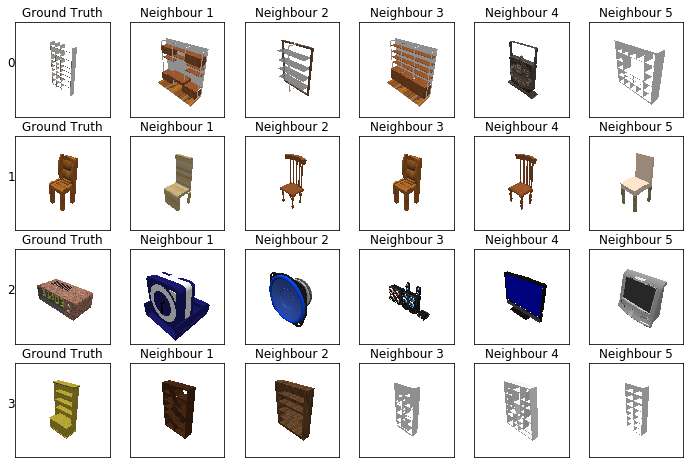

In [10]:
utils.retrieve_images(y_pred, ids, data_dir_val, class_dir, num_KNN=5, max_show=4, shuffle=True)

Description: this is a comfortable chair with armrests


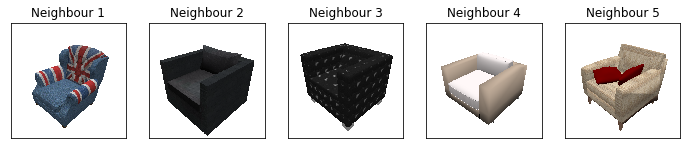

In [30]:
sentence = 'this is a comfortable chair with armrests'
#sentence = input("Enter sentence")
utils.retrieve_one_sentence(net, data_dir_val, working_dir, sentence, class_dir, y_pred , ids, shape, num_KNN=5,samples_pointcould=2500)